#### Motivation Multi-Index Set

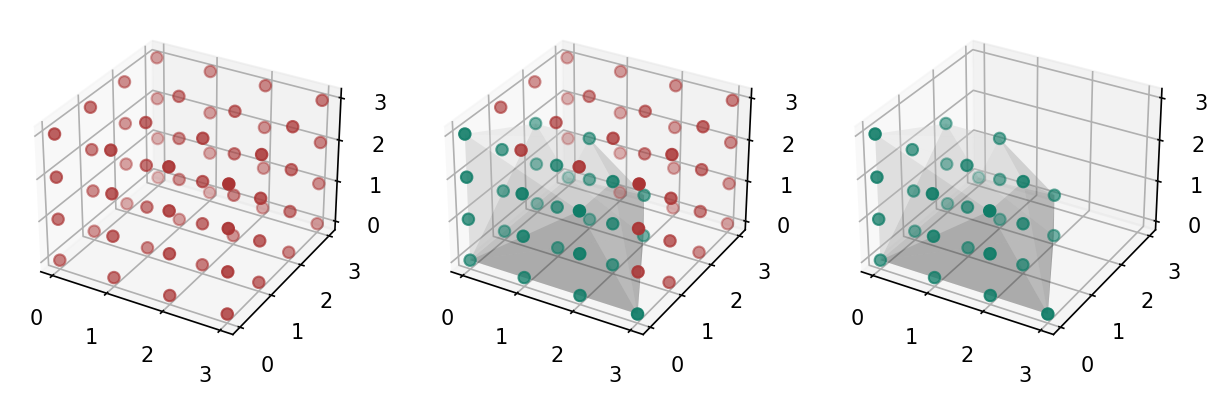

In [1]:
import numpy as np
import nexpy as nxp
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator

# Create coordinates for maximal degree simplex
maximal_vertices = nxp.utils.get_exponent_matrix_iterative(
    spatial_dimension=3,
    poly_degree=3,
    p_degree=np.infty)

# Create coordinates for euclidean degree simplex
euclidean_vertices = nxp.utils.get_exponent_matrix_iterative(
    spatial_dimension=3,
    poly_degree=3,
    p_degree=2.0)

# Create coordinates setminus
setminus_vertices = np.array(
    list(set(map(tuple, maximal_vertices)) - set(map(tuple, euclidean_vertices))))

# Separate coordinates into X, Y, Z
X_maximal, Y_maximal, Z_maximal = maximal_vertices.T
X_euclidean, Y_euclidean, Z_euclidean = euclidean_vertices.T
X_setminus, Y_setminus, Z_setminus = setminus_vertices.T

# Set up the plot
s = 30

fig, axs = plt.subplots(1, 3, figsize=(10, 3), subplot_kw={'projection': '3d'}, dpi = 150)

# Set integer ticks on axes
def set_integer_ticks(ax):
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.zaxis.set_major_locator(MaxNLocator(integer=True))
    
for ax in axs:
    
    set_integer_ticks(ax)

# Plot convex hulls
for ax, vertices in zip([axs[1], axs[2]], [euclidean_vertices, euclidean_vertices]):
    
    hull = ConvexHull(vertices)
    
    # Plot the convex hull
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=hull.simplices, cmap='gray', color='blue', alpha=0.2)

axs[0].scatter(X_maximal, Y_maximal, Z_maximal, c='#AA3535', s=s)

axs[1].scatter(X_setminus, Y_setminus, Z_setminus, c='#AA3535', s=s)
axs[1].scatter(X_euclidean, Y_euclidean, Z_euclidean, c='#117D68', s=s)

axs[2].scatter(X_euclidean, Y_euclidean, Z_euclidean, c='#117D68', s=s)

# Plot the hypercube
plt.show()